2. (60%) Drop the “origin” variable from AutoMPG and apply 𝑘-means, hierarchical clustering, and DBSCAN to the modified AutoMPG. Do the clustering results match the origin? Compare and discuss the results with those from the supervised learning methods done in HW#07-EX3.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/homework_8/auto-mpg.csv', sep=";", header=None, names=['Mpg', 'Cylinders', 'Displacement' ,'Horsepower', 'Weight', 'Acceleration', 'Model year', 'Origin', 'Car name'])


df.head()

,Mpg,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model year,Origin,Car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
# X and y
X = df [['Cylinders', 'Displacement' ,'Horsepower', 'Weight', 'Acceleration', 'Model year', 'Mpg']]
y = df[['Origin']]




In [ ]:
from collections import Counter
count_y = Counter(y['Origin'])
print(count_y)

Counter({1: 245, 3: 79, 2: 68})


In [ ]:
list_y = []
y_val = []
for i in y['Origin']:
  y_val.append(i-1)
for i in y_val:
  if i in list_y:
    pass
  else:
    list_y.append(i)

list_y.sort()
print(list_y)
n_var = len(list_y)
print(len(y_val))


[0, 1, 2]
392


Standardize features by removing the mean and scaling to unit variance.


In [ ]:
from sklearn.preprocessing import StandardScaler 


sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)


# **K-means**

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=n_var, random_state=0).fit(X)
print((kmeans.labels_))


[2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 1 1 0 0 0 0 0 0 1 2 2 2 2 0 0 0 1 1 1 1 1
 2 2 2 2 2 2 2 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 0 2 2 2
 2 1 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 0 2 2 2 2 1 0 0 0 0
 0 1 0 2 2 0 0 0 1 2 0 1 2 1 1 1 0 0 0 0 1 1 1 2 2 2 2 2 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 2 2 2 2 1 1 1 1 1 1 2 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 2 2 2 2 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 2 1 1 1 2 2 2 2 0 0 0 0 0 2 1 2
 2 1 1 1 1 2 2 2 2 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 2 2 1 1 1 0 1 1 1 1 1
 1 2 1 2 2 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 1 1 2 2 2 2 2 1 2 0 0 0 0 1
 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0]


Find the accuracy for K-Means

In [ ]:
from sklearn.metrics import confusion_matrix

cm_kmeans = confusion_matrix(y_val, (kmeans.labels_))

acc_cm_kmeans = np.trace(cm_kmeans) / np.sum(cm_kmeans)
print(acc_cm_kmeans)

0.20153061224489796


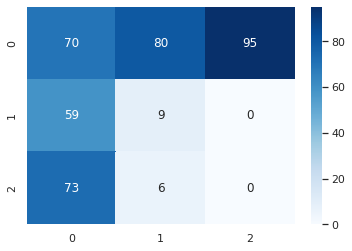

In [ ]:
import seaborn as sns; sns.set()

ax = sns.heatmap(cm_kmeans, annot=True, fmt="d", cmap="Blues")

In [ ]:
!pip install scikit-learn==0.22.2

     |████████████████████████████████| 7.1 MB 4.7 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.22.2 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.22.2 which is incompatible.


Find **the best** accuracy for K Meas

/usr/local/lib/python3.7/dist-packages/sklearn/utils/linear_assignment_.py:22: FutureWarning: The linear_assignment_ module is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


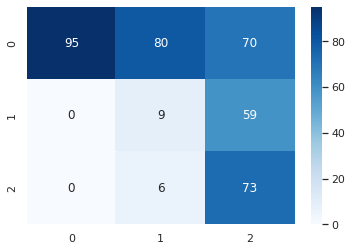

In [ ]:
from sklearn.utils.linear_assignment_ import linear_assignment
import numpy as np

def _make_cost_m(cm):
    s = np.max(cm)
    return (- cm + s)

indexes = linear_assignment(_make_cost_m(cm_kmeans))
js = [e[1] for e in sorted(indexes, key=lambda x: x[0])]
cm2_kmeans = cm_kmeans[:, js]

ax = sns.heatmap(cm2_kmeans, annot=True, fmt="d", cmap="Blues")

In [ ]:
max_acc_kmeans = np.trace(cm2_kmeans) / np.sum(cm2_kmeans)
print("Max acc using K Means:", 100* max_acc_kmeans,"%") 

Max acc using K Means: 45.1530612244898 %


# **Hierarchical clustering**

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=n_var, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)
print(cluster.labels_)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 2 2 0 0 0 0 0 0 2 1 1 1 1 0 0 0 2 2 2 2 2
 1 1 1 1 1 1 1 2 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 0 1 1 1 1 2 0 0 0 0
 0 2 0 1 1 0 0 0 0 1 0 2 1 2 2 2 0 0 0 0 2 2 2 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 2 2 2 2 1 1 1 1 2 2 2 2 2 1 1 0 0 2 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 2 2 2 2 0 0 0 0 2 2 2 2 0 0 0 0 0 1 0 2 2 1 1 1 1 0 0 0 0 0 1 2 1
 1 2 2 2 2 1 1 1 1 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 1 1 1 2 2 2 0 2 2 2 2 2
 2 1 2 1 1 0 0 0 0 0 0 0 0 0 2 0 2 0 0 2 2 0 2 2 1 1 1 1 1 1 1 1 0 0 0 0 0
 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Find the accuracy for Hierarchical clustering

0.20153061224489796


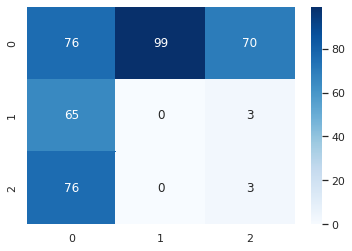

In [ ]:
cm_hierar = confusion_matrix(y_val, (cluster.labels_))

acc_cm_hierar = np.trace(cm_hierar) / np.sum(cm_hierar)
print(acc_cm_hierar)
ax = sns.heatmap(cm_hierar, annot=True, fmt="d", cmap="Blues")

Find **the best** accuracy for Hierarchical clustering



/usr/local/lib/python3.7/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


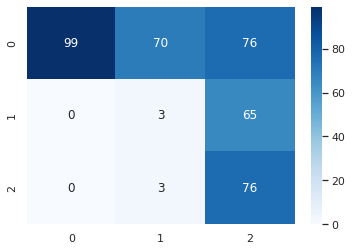

In [ ]:
indexes = linear_assignment(_make_cost_m(cm_hierar))
js = [e[1] for e in sorted(indexes, key=lambda x: x[0])]
cm2_hierar = cm_hierar[:, js]

ax = sns.heatmap(cm2_hierar, annot=True, fmt="d", cmap="Blues")

In [ ]:
max_acc_hierar_ = np.trace(cm2_hierar) / np.sum(cm2_hierar)
print("Max acc using Hierarchical clustering:", 100* max_acc_hierar_,"%") 

Max acc using Hierarchical clustering: 45.40816326530612 %


# **DBSCAN**

In [ ]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=0.3, min_samples=3).fit(X)


#Set positive values for matching with the original ones
for i in range(0,len(clustering.labels_)):
  clustering.labels_[i] = abs(clustering.labels_[i])

print(clustering.labels_)



[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


Find the accuracy for DBSCAN

0.17091836734693877


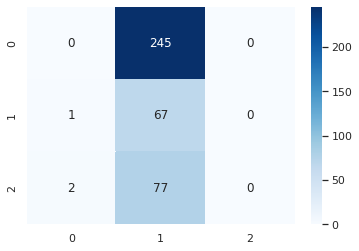

In [ ]:
cm_DBSCAN = confusion_matrix(y_val, (clustering.labels_))

acc_cm_DBSCAN = np.trace(cm_DBSCAN) / np.sum(cm_DBSCAN)
print(acc_cm_DBSCAN)
ax = sns.heatmap(cm_DBSCAN, annot=True, fmt="d", cmap="Blues")

Find **the best** accuracy for DBSCAN



/usr/local/lib/python3.7/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


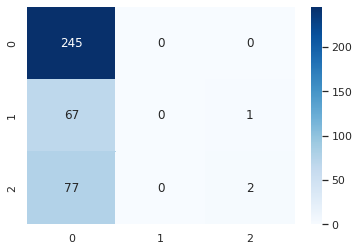

In [ ]:
indexes = linear_assignment(_make_cost_m(cm_DBSCAN))
js = [e[1] for e in sorted(indexes, key=lambda x: x[0])]
cm2_DBSCAN = cm_DBSCAN[:, js]

ax = sns.heatmap(cm2_DBSCAN, annot=True, fmt="d", cmap="Blues")

In [ ]:
max_acc_DBSCAN = np.trace(cm2_DBSCAN) / np.sum(cm2_DBSCAN)
print("Max acc using DBSCAN:", 100* max_acc_DBSCAN,"%") 

Max acc using DBSCAN: 63.01020408163265 %


Conclusion: 

The predictions weren't good compared to supervisory algorithms. Also, most of the Origin values have been labeled as 1, making the projection difficult. 

Labels:
1: 245;
3: 79;
2: 68

If y is available, maybe the best approach will be to use supervisory learning algorithms rather than unsupervised ones.